In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3

In [2]:
from sqlalchemy import create_engine
#engine = create_engine('sqlite://', echo=False)
#engine = create_engine('sqlite:////Users/monikabagyal/Google_drive_minsifye/Courses/Spring2020/InnovationAnalytics/GroupProject/', echo=False)

sql_engine = create_engine('sqlite:///test.db', echo=False)
connection = sql_engine.raw_connection()


In [3]:
pwd

'/Users/monikabagyal/Google_drive_minsifye/Courses/Spring2020/InnovationAnalytics/GroupProject'

In [379]:
skytrax = pd.read_excel("skytrax.xlsx")

In [380]:
skytrax.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Working with only US Domestic Airlines

In [381]:
skytrax = skytrax[skytrax['airline'].isin(['American Airlines', 'Delta Air Lines', 'Southwest Airlines', 'United Airlines','Jetblue Airways', 'Frontier Airlines', 'Spirit Airlines'])]
skytrax.reset_index(inplace=True)
skytrax.drop('index', inplace=True, axis=1)
skytrax.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,American Airlines,5.0,B Merton,11th May 2019,âœ… Trip Verified | We were scheduled to fly f...,Boeing 737-8,Couple Leisure,First Class,Miami to Orlando,2019-05-01,5.0,5.0,5.0,NaN,3.0,3.0,no
1,American Airlines,1.0,Dave Benton,10th May 2019,Not Verified | I had a flight from Dallas to S...,Boeing 737-800,Family Leisure,Premium Economy,Dallas to San Diego,2019-05-01,1.0,2.0,2.0,2.0,1.0,1.0,no
2,American Airlines,1.0,J Richard,10th May 2019,Not Verified | Pittsburgh to Tampa. Every sing...,NaN,Family Leisure,Economy Class,Pittsburgh to Tampa,2019-04-01,1.0,1.0,NaN,NaN,1.0,1.0,no
3,American Airlines,1.0,G Meares,9th May 2019,âœ… Trip Verified | Dallas to Atlanta. You hav...,NaN,Business,Economy Class,Dallas to Atlanta,2019-05-01,3.0,2.0,1.0,1.0,1.0,1.0,no
4,American Airlines,3.0,S Klein,8th May 2019,âœ… Trip Verified | Tampa to Vancouver via Dal...,NaN,Couple Leisure,Economy Class,Tampa to Vancouver via Dallas,2019-05-01,1.0,1.0,1.0,3.0,1.0,1.0,no


In [382]:
print("Total rows:",skytrax.shape[0])

Total rows: 13359


In [383]:
skytrax.airline.value_counts()

Spirit Airlines       2934
American Airlines     2867
United Airlines       2829
Frontier Airlines     1624
Delta Air Lines       1547
Southwest Airlines     913
Jetblue Airways        645
Name: airline, dtype: int64

# Total Customer Reviews for Each Airline

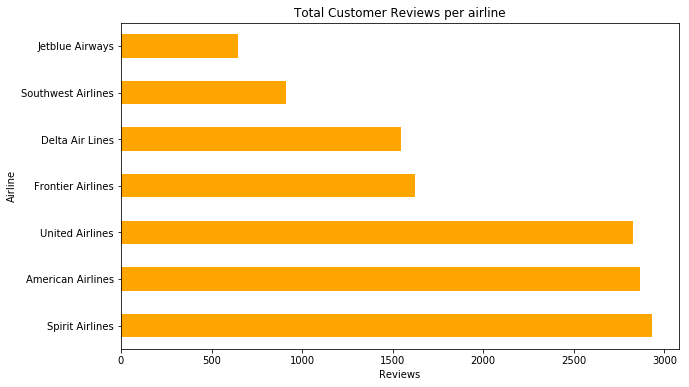

In [384]:
skytrax.airline.value_counts().plot(kind='barh', title='Total Customer Reviews per airline', figsize=(10,6), color='orange');
plt.xlabel('Reviews')
plt.ylabel('Airline');
#plt.savefig('plot1.png', bbox_inches = 'tight');

### Percentage of missing values per column 

In [385]:
np.sum(skytrax.isnull())/skytrax.shape[0]

airline            0.000000
overall            0.028071
author             0.000000
review_date        0.000000
customer_review    0.000000
aircraft           0.833820
traveller_type     0.277117
cabin              0.094768
route              0.277940
date_flown         0.278838
seat_comfort       0.062205
cabin_service      0.059361
food_bev           0.299948
entertainment      0.413504
ground_service     0.283180
value_for_money    0.027397
recommended        0.023804
dtype: float64

## Dropping Aircraft and Route column

In [386]:
skytrax = skytrax[['airline', 'overall', 'author', 'review_date', 'customer_review',
       'traveller_type', 'cabin', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended']]

In [426]:
old_skytrax = skytrax.copy()

# Handling Missing Values
### these columns seat_comfort	cabin_service	food_bev	entertainment	ground_service	value_for_money	need to be filled with mean() value

In [389]:
skytrax[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']] = skytrax[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']].apply(lambda row: row.fillna(row.mean()), axis=1)

In [390]:
skytrax[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']] = skytrax[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']].apply(lambda row: row.fillna(0), axis=1)

In [391]:
skytrax[['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']] = skytrax[['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']].apply(lambda row: row.fillna(row.mean()), axis=1)

In [392]:
(np.sum(skytrax.isnull())/skytrax.shape[0])*100

airline             0.000000
overall             0.000000
author              0.000000
review_date         0.000000
customer_review     0.000000
traveller_type     27.711655
cabin               9.476757
date_flown         27.883824
seat_comfort        0.000000
cabin_service       0.000000
food_bev            0.000000
entertainment       0.000000
ground_service      0.000000
value_for_money     0.000000
recommended         2.380418
dtype: float64

In [393]:
skytrax.head()

,airline,overall,author,review_date,customer_review,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,American Airlines,5.0,B Merton,11th May 2019,âœ… Trip Verified | We were scheduled to fly f...,Couple Leisure,First Class,2019-05-01,5.0,5.0,5.0,4.2,3.0,3.0,no
1,American Airlines,1.0,Dave Benton,10th May 2019,Not Verified | I had a flight from Dallas to S...,Family Leisure,Premium Economy,2019-05-01,1.0,2.0,2.0,2.0,1.0,1.0,no
2,American Airlines,1.0,J Richard,10th May 2019,Not Verified | Pittsburgh to Tampa. Every sing...,Family Leisure,Economy Class,2019-04-01,1.0,1.0,1.0,1.0,1.0,1.0,no
3,American Airlines,1.0,G Meares,9th May 2019,âœ… Trip Verified | Dallas to Atlanta. You hav...,Business,Economy Class,2019-05-01,3.0,2.0,1.0,1.0,1.0,1.0,no
4,American Airlines,3.0,S Klein,8th May 2019,âœ… Trip Verified | Tampa to Vancouver via Dal...,Couple Leisure,Economy Class,2019-05-01,1.0,1.0,1.0,3.0,1.0,1.0,no


In [394]:
# Index 25 has Null values of cabin data
skytrax.ix[25].customer_review

/Users/monikabagyal/anaconda3/envs/mona/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


'âœ… Trip Verified | Cancun to Milan via Miami. We were six counting a handicap person and an infant (2 years). Our flight took off delayed of one hour from Cancun, when we finally arrived in MIA we had only about 1 hour to the connection. So then the 1st soap opera began, no one came to take my stepfather (the handicap) at the plane, after 10 min some one came and left him at a place with others, then the lady from AA said we should reschedule our flight home for the other day, after a brief discussion she called someone and he and my mother went one way and my sister, niece and brother in law in another. We used the APC (Automated Passport Control) and went to the line, or should i say lines, i went one way. then security control. We all met after SC and went to the gate, there the second soap opera began. apparently some battery had to be changed and after multiple delays, emails, and texts and about 3 hours waiting later they decided to change the airplane, so we had to change gate

In [395]:
skytrax.ix[25]

airline                                            American Airlines
overall                                                            1
author                                    Luis Eduardo Vieira mendes
review_date                                          28th April 2019
customer_review    âœ… Trip Verified | Cancun to Milan via Miami....
traveller_type                                                   NaN
cabin                                                            NaN
date_flown                                                       NaT
seat_comfort                                                       0
cabin_service                                                      0
food_bev                                                           0
entertainment                                                      0
ground_service                                                     0
value_for_money                                                    0
recommended                       

In [396]:
skytrax['traveller_type'].value_counts()

Solo Leisure      3229
Couple Leisure    2431
Family Leisure    2321
Business          1676
Name: traveller_type, dtype: int64

In [397]:
skytrax['cabin'].value_counts()

Economy Class      10341
Business Class       656
Premium Economy      549
First Class          547
Name: cabin, dtype: int64

In [398]:
skytrax['recommended'].value_counts()

no     9871
yes    3170
Name: recommended, dtype: int64

In [399]:
skytrax['review_date'].head(5)

0    11th May 2019
1    10th May 2019
2    10th May 2019
3     9th May 2019
4     8th May 2019
Name: review_date, dtype: object

In [400]:
# splitting review_date column to get month and year value in separate columns
ignore, skytrax['review_month'], skytrax['review_year'] = skytrax['review_date'].str.split(' ').str

In [401]:
look_up = {'January': 1, 'February':2, 'March':3, 'April':4, 'May':5,
            'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

skytrax['review_month'] = skytrax['review_month'].apply(lambda x: look_up[x])


In [402]:
# Changing datatype of review_year column
skytrax['review_year'] = skytrax['review_year'].apply(lambda x:int(x))


In [403]:
skytrax.head()

,airline,overall,author,review_date,customer_review,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,review_month,review_year
0,American Airlines,5.0,B Merton,11th May 2019,âœ… Trip Verified | We were scheduled to fly f...,Couple Leisure,First Class,2019-05-01,5.0,5.0,5.0,4.2,3.0,3.0,no,5,2019
1,American Airlines,1.0,Dave Benton,10th May 2019,Not Verified | I had a flight from Dallas to S...,Family Leisure,Premium Economy,2019-05-01,1.0,2.0,2.0,2.0,1.0,1.0,no,5,2019
2,American Airlines,1.0,J Richard,10th May 2019,Not Verified | Pittsburgh to Tampa. Every sing...,Family Leisure,Economy Class,2019-04-01,1.0,1.0,1.0,1.0,1.0,1.0,no,5,2019
3,American Airlines,1.0,G Meares,9th May 2019,âœ… Trip Verified | Dallas to Atlanta. You hav...,Business,Economy Class,2019-05-01,3.0,2.0,1.0,1.0,1.0,1.0,no,5,2019
4,American Airlines,3.0,S Klein,8th May 2019,âœ… Trip Verified | Tampa to Vancouver via Dal...,Couple Leisure,Economy Class,2019-05-01,1.0,1.0,1.0,3.0,1.0,1.0,no,5,2019


In [404]:
skytrax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13359 entries, 0 to 13358
Data columns (total 17 columns):
airline            13359 non-null object
overall            13359 non-null float64
author             13359 non-null object
review_date        13359 non-null object
customer_review    13359 non-null object
traveller_type     9657 non-null object
cabin              12093 non-null object
date_flown         9634 non-null datetime64[ns]
seat_comfort       13359 non-null float64
cabin_service      13359 non-null float64
food_bev           13359 non-null float64
entertainment      13359 non-null float64
ground_service     13359 non-null float64
value_for_money    13359 non-null float64
recommended        13041 non-null object
review_month       13359 non-null int64
review_year        13359 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(2), object(7)
memory usage: 1.7+ MB


In [405]:
skytrax = skytrax[['airline', 'overall', 'customer_review',
       'traveller_type', 'cabin', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'recommended', 'review_month', 'review_year']]

In [406]:
skytrax = skytrax.fillna('Null')

,Avg_Rating
airline,
American Airlines,2.896843
Delta Air Lines,4.536436
Frontier Airlines,2.298327
Jetblue Airways,4.926253
Southwest Airlines,5.065991
Spirit Airlines,2.607277
United Airlines,3.028279


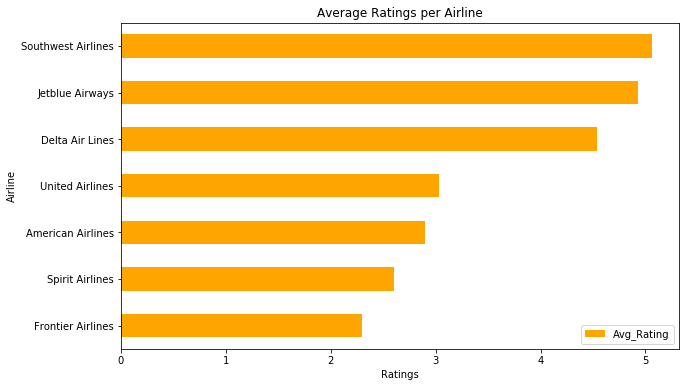

In [407]:
sky_mean = skytrax[['airline', 'overall']].groupby('airline').mean()
sky_mean.columns = ['Avg_Rating']
sky_mean.sort_values('Avg_Rating', ascending=False)

sky_mean.sort_values('Avg_Rating').plot(kind='barh', title='Average Ratings per Airline', figsize=(10,6), color='orange');
plt.xlabel('Ratings')
plt.ylabel('Airline');
sky_mean

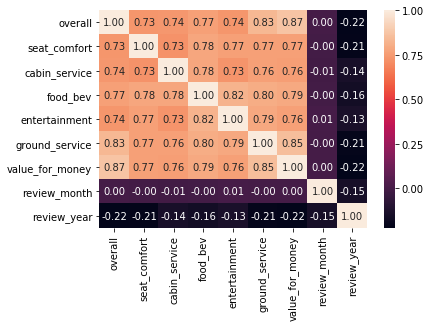

In [408]:
sns.heatmap(skytrax.corr(), annot=True, fmt='.2f');


In [409]:
skytrax.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,review_month,review_year
count,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000
mean,3.224420,2.154421,2.378309,2.009423,2.037333,2.043731,2.063989,6.382065,2016.263942
std,3.227973,1.404589,1.564284,1.360926,1.420619,1.451273,1.521475,3.357431,1.830220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2010.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2015.000000
50%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,2016.000000
75%,5.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,9.000000,2018.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,2019.000000


In [410]:
skytrax.airline.value_counts()

Spirit Airlines       2934
American Airlines     2867
United Airlines       2829
Frontier Airlines     1624
Delta Air Lines       1547
Southwest Airlines     913
Jetblue Airways        645
Name: airline, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a35fac588>,
      dtype=object)

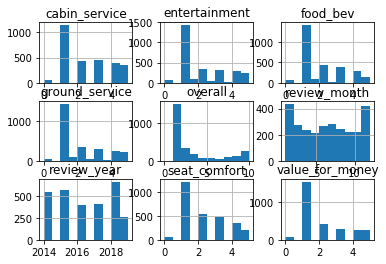

In [411]:
skytrax[skytrax['airline']=='United Airlines'].hist()

In [412]:
skytrax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13359 entries, 0 to 13358
Data columns (total 14 columns):
airline            13359 non-null object
overall            13359 non-null float64
customer_review    13359 non-null object
traveller_type     13359 non-null object
cabin              13359 non-null object
seat_comfort       13359 non-null float64
cabin_service      13359 non-null float64
food_bev           13359 non-null float64
entertainment      13359 non-null float64
ground_service     13359 non-null float64
value_for_money    13359 non-null float64
recommended        13359 non-null object
review_month       13359 non-null int64
review_year        13359 non-null int64
dtypes: float64(7), int64(2), object(5)
memory usage: 1.4+ MB


In [413]:
skytrax_modified = pd.get_dummies(skytrax.drop(['customer_review', 'airline'], axis=1))

In [414]:
skytrax_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13359 entries, 0 to 13358
Data columns (total 22 columns):
overall                          13359 non-null float64
seat_comfort                     13359 non-null float64
cabin_service                    13359 non-null float64
food_bev                         13359 non-null float64
entertainment                    13359 non-null float64
ground_service                   13359 non-null float64
value_for_money                  13359 non-null float64
review_month                     13359 non-null int64
review_year                      13359 non-null int64
traveller_type_Business          13359 non-null uint8
traveller_type_Couple Leisure    13359 non-null uint8
traveller_type_Family Leisure    13359 non-null uint8
traveller_type_Null              13359 non-null uint8
traveller_type_Solo Leisure      13359 non-null uint8
cabin_Business Class             13359 non-null uint8
cabin_Economy Class              13359 non-null uint8
cabin_First C

# Let's Predict Recommended column value based on other columns

In [415]:
df_train = skytrax_modified[skytrax_modified['recommended_Null'] == 0]
df_test = skytrax_modified[skytrax_modified['recommended_Null'] == 1]

In [416]:
df_train.corr().head(1).transpose()

,overall
overall,1.000000
seat_comfort,0.764898
cabin_service,0.773906
food_bev,0.796085
entertainment,0.766282
ground_service,0.865788
value_for_money,0.902727
review_month,0.000996
review_year,-0.219770
traveller_type_Business,-0.062490


In [417]:
X = df_train.drop(['recommended_Null', 'recommended_no', 'cabin_Null', 'traveller_type_Null', 'recommended_yes'], axis=1)
y = df_train['recommended_yes']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)



In [418]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1962
          1       0.95      0.93      0.94       647

avg / total       0.97      0.97      0.97      2609

[[1929   33]
 [  43  604]]


In [419]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))



             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1962
          1       0.95      0.93      0.94       647

avg / total       0.97      0.97      0.97      2609

[[1932   30]
 [  46  601]]


In [420]:
X_prod = df_test.drop(['recommended_Null', 'recommended_no', 'cabin_Null', 'traveller_type_Null', 'recommended_yes'], axis=1)
recommended_category = rfc.predict(X_prod)

recommended_category


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### As all the null values of recommended column got prediction as 0, no need to make any changes to final column. Only recommended_yes column is enough

In [421]:
skytrax_modified = skytrax_modified.drop(['recommended_Null', 'recommended_no', 'cabin_Null', 'traveller_type_Null'], axis=1)


In [422]:
skytrax_modified.head()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,review_month,review_year,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,recommended_yes
0,5.0,5.0,5.0,5.0,4.2,3.0,3.0,5,2019,0,1,0,0,0,0,1,0,0
1,1.0,1.0,2.0,2.0,2.0,1.0,1.0,5,2019,0,0,1,0,0,0,0,1,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5,2019,0,0,1,0,0,1,0,0,0
3,1.0,3.0,2.0,1.0,1.0,1.0,1.0,5,2019,1,0,0,0,0,1,0,0,0
4,3.0,1.0,1.0,1.0,3.0,1.0,1.0,5,2019,0,1,0,0,0,1,0,0,0


In [423]:
skytrax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13359 entries, 0 to 13358
Data columns (total 14 columns):
airline            13359 non-null object
overall            13359 non-null float64
customer_review    13359 non-null object
traveller_type     13359 non-null object
cabin              13359 non-null object
seat_comfort       13359 non-null float64
cabin_service      13359 non-null float64
food_bev           13359 non-null float64
entertainment      13359 non-null float64
ground_service     13359 non-null float64
value_for_money    13359 non-null float64
recommended        13359 non-null object
review_month       13359 non-null int64
review_year        13359 non-null int64
dtypes: float64(7), int64(2), object(5)
memory usage: 1.4+ MB


In [430]:

df_skytrax = pd.get_dummies(skytrax.drop(['customer_review', 'traveller_type', 'cabin', 'airline'], axis=1))
df_skytrax[['airline', 'customer_review', 'traveller_type', 'cabin']] = skytrax[['airline', 'customer_review', 'traveller_type', 'cabin']]
df_skytrax = df_skytrax.drop(['recommended_Null', 'recommended_no', ], axis=1)



In [431]:
df_skytrax.head()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,review_month,review_year,recommended_yes,airline,customer_review,traveller_type,cabin
0,5.0,5.0,5.0,5.0,4.2,3.0,3.0,5,2019,0,American Airlines,âœ… Trip Verified | We were scheduled to fly f...,Couple Leisure,First Class
1,1.0,1.0,2.0,2.0,2.0,1.0,1.0,5,2019,0,American Airlines,Not Verified | I had a flight from Dallas to S...,Family Leisure,Premium Economy
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5,2019,0,American Airlines,Not Verified | Pittsburgh to Tampa. Every sing...,Family Leisure,Economy Class
3,1.0,3.0,2.0,1.0,1.0,1.0,1.0,5,2019,0,American Airlines,âœ… Trip Verified | Dallas to Atlanta. You hav...,Business,Economy Class
4,3.0,1.0,1.0,1.0,3.0,1.0,1.0,5,2019,0,American Airlines,âœ… Trip Verified | Tampa to Vancouver via Dal...,Couple Leisure,Economy Class


# End Here

In [ ]:
# Getting data in SQL form
import sqlite3

# connect to the database
conn = sqlite3.connect('population_data.db')

# run a query
pd.read_sql('SELECT * FROM population_data', conn)

In [25]:
# Fixing overall rating values

#working_df.to_sql('data', connection,index=False, if_exists='append')


skytrax.to_sql('skytrax_data', connection, index=False, if_exists='replace')

In [28]:
pd.read_sql("SELECT count(1) FROM skytrax_data where overall == 5", sql_engine)

,count(1)
0,336
